# AIT-110: Statistical Learning Theory
### Instructor: Dr. Aniket Majumdar
### Course Overview: We focus on statistical learning theory, covering foundational and applied aspects of machine learning for AI applications.


# Introduction to Statistical Learning


*Machine Learning* is concerned with learning patterns from data. A traditional computer program *performs* tasks it has been instructed to do. A machine learning program performs tasks it has *learned* to do.

*Statistical Learning* is a subfield of machine learning that focuses on predicting future data using statistical models. It is a vast set of tools for understanding patterns in data.

Formally, *statistical learning* is a framework that involves using statistical models and algorithms to gain insight from data. It can be broadly categorized into two main types:
* Supervised Learning: This involves building models from labeled data, where the output variable is known. Examples include:
>1. Regression: Predicting a continuous output (e.g., house prices).
>1. Classification: Predicting a categorical output (e.g., spam detection).
* Unsupervised Learning: This involves finding patterns and structures in unlabeled data, where the output variable is not known. Examples include:  
>1. Clustering: Grouping similar data points together.
>1. Dimensionality Reduction: Reducing the number of variables while preserving important information.

Informally, statistical learning is concerned with coming up with algorithms (recipies) for recognizing paterns. This is one aspect of *Artifical Intelligence* (AI). In a nutshell, statistical learning is the design of automated methods for learning good rules from data.

**Example 1** Face recognition problem: Does this image contain a face?
**Approach** Present many examples of images of a face and many examples of images *without* a face.

**Example 2** Speech Recognition problem: Recognize the words uttered by a speaker.

**Example 3** Medical Diagnosis: Is there a disease present? Which disease?

**Example 4** Automated stock trading strategies: Buy, sell, or hold decisions.

**Example 5** Marketing Application: Understand which type of current customers are similar to each other, based on certain observed characteristics. Pitch products/services accordingly.

**Other Examples**: Your turn.



###Example Data set


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
air_passengers = pd.read_csv('drive/My Drive/Colab Notebooks/Air_Passengers.csv')
air_passengers.head(10)

,Passengers_count,marketing_cost,percent_delayed_flights,number_of_trips,customer_ratings,poor_weather_index,percent_male_customers,Holiday_week,percent_female_customers
0,23291,3588.1,0.21,1503,5,0.19,38,0,61.2
1,25523,3186.3,0.20,1881,6,0.22,35,0,64.4
2,25620,3342.0,0.27,1850,7,0.27,51,0,48.0
3,19625,2512.5,0.18,1295,8,0.19,37,0,62.6
4,27231,3012.1,0.23,1100,9,0.24,38,0,61.2
5,28506,3841.6,0.14,1888,10,0.15,46,0,53.4
6,22899,2384.9,0.25,1983,4,0.21,41,0,58.6
7,33300,4622.0,0.18,1673,5,0.18,38,0,61.1
8,24770,3032.0,0.27,1925,6,0.28,39,0,60.9
9,22390,2579.0,0.14,920,7,0.15,53,0,46.3


In [1]:
print(air_passengers.columns)

NameError: name 'air_passengers' is not defined

###The Setup

Data collected from airline companies. Each row has the number of passengers in a week and some other factors that may directly or indirectly impact the number of passengers.

####The Problem: Predict the passengers count based on marketing expenses.



*   **Measurements**: Individual columns
* **Response variable/dependent variable**: Passengers_count
* **Features/Independent variables/Predictors**: All other columns
*   **Feature vector** = (marketing_cost, percent_delayed_flights, ..., percent_female_customers). This is an 8-dimensional vector.


In [ ]:
air_passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Passengers_count          263 non-null    int64  
 1   marketing_cost            263 non-null    float64
 2   percent_delayed_flights   263 non-null    float64
 3   number_of_trips           263 non-null    int64  
 4   customer_ratings          263 non-null    int64  
 5   poor_weather_index        263 non-null    float64
 6   percent_male_customers    263 non-null    int64  
 7   Holiday_week              263 non-null    int64  
 8   percent_female_customers  263 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 18.6 KB


In [ ]:
air_passengers.describe()

,Passengers_count,marketing_cost,percent_delayed_flights,number_of_trips,customer_ratings,poor_weather_index,percent_male_customers,Holiday_week,percent_female_customers
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,28865.581749,3705.558175,0.237643,1386.338403,6.992395,0.238821,44.638783,0.038023,54.839544
std,5579.293117,761.549485,0.079150,393.210697,1.994252,0.082641,8.815904,0.191616,8.833267
min,17591.000000,1902.200000,0.080000,703.000000,4.000000,0.060000,30.000000,0.000000,39.000000
25%,24906.000000,3144.350000,0.170000,1021.500000,5.000000,0.170000,37.000000,0.000000,47.900000
50%,28426.000000,3695.600000,0.230000,1456.000000,7.000000,0.240000,44.000000,0.000000,55.200000
75%,31611.500000,4180.350000,0.310000,1727.000000,9.000000,0.300000,52.000000,0.000000,62.150000
max,45899.000000,5753.500000,0.420000,1989.000000,10.000000,0.440000,60.000000,1.000000,69.700000


In [2]:
import matplotlib.pyplot as plt
plt.scatter(air_passengers['marketing_cost'], air_passengers['Passengers_count'])
plt.title('Marketing Cost vs Passengers Count')
plt.xlabel('Marketing Cost')
plt.ylabel('Passengers Count')
plt.show()

ModuleNotFoundError: No module named 'matplotlib'

###What Do We See?

*Linear Relationship*

####Restate the problem: Find (establish/estimate) a linear equation connecting the predictor and the response variable.


## Simple linear regression

The basic linear regression model is
$$
y = \beta_0 + \beta_1 X + \epsilon
$$
where $\beta_0$ and $\beta_1$, the intercept and the slope, are unknown parameters, and the error term

$$\epsilon \sim N(0, \sigma)$$

is i.i.d. (independent and identially distributed).

We do not know $\beta_0$ and $\beta_1$, so we have to estimate these. We call these estimates $\hat{\beta_0}$ and $\hat{\beta_1}$, and $\hat{y_i}$ are the estimated values for $y_i$ based on these coefficients.

## Residuals
The **residuals** are given by
    $\epsilon_i = y_i - \hat{y_i}$

Let's look at a motivationg example, using *simulated* data.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as scs
import numpy as np
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

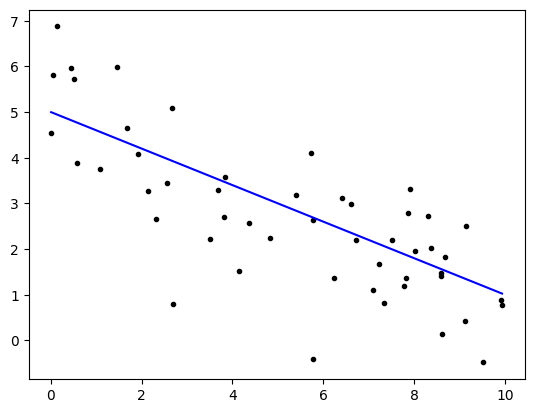

In [ ]:
n = 50
b0 = 5
b1 = -0.4
x = scs.uniform(0,10).rvs(n)
y = b0 + b1*x + scs.norm(0,1).rvs(n)
xmin = x.min()
xmax = x.max()
plt.plot(x, y, 'k.')
plt.plot([xmin, xmax], [b0+b1*xmin, b0+b1*xmax], 'b-')

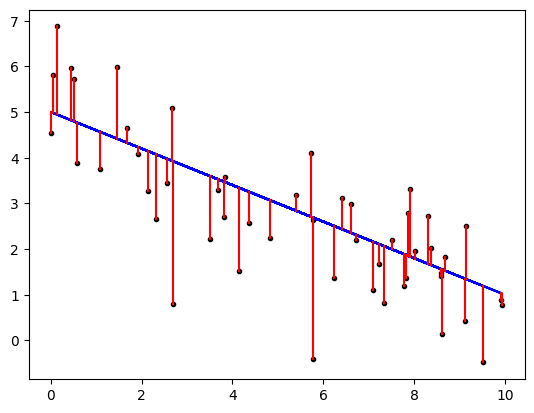

In [ ]:
plt.plot(x, y, 'k.')
plt.plot(x, b0+b1*x, 'b-')
for xi, yi in zip(x,y):
    plt.plot([xi, xi], [yi, b0 + b1*xi], 'r-')

###Method of Least Squares (C. F. Gauss 1777 - 1855)
We want to choose $\beta_0$ and $\beta_1$ such that these are small.
The residual sum of squares (RSS) is given by,

RSS  = $\epsilon_1^2 + \epsilon_2^2 + ... + \epsilon_n^2$
= $\sum_{i=1}^n (y_i - \hat y_i)^2$
= $\sum_{i=1}^n (y_i-\hat \beta_0-\hat \beta_1 x_i)^2$

Minimizing RSS gives

$$\hat \beta_0  = \bar{y} - \hat \beta_1 \bar{x}$$


$$\hat \beta_1  = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{ \sum_{i=1}^n (x_i - \bar{x})^2 }$$



This is maximum-likelihood estimate for the parameters, assuming a *linear* model with *normal* errors.

Applying this to the 'air_passengers' data, we get the following:

In [ ]:
import statsmodels.formula.api as sm
model1 = sm.ols(formula='Passengers_count ~ marketing_cost', data=air_passengers)
fitted1 = model1.fit()
fitted1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Passengers_count   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     830.0
Date:                Wed, 03 Sep 2025   Prob (F-statistic):           4.87e-83
Time:                        01:02:19   Log-Likelihood:                -2453.4
No. Observations:                 263   AIC:                             4911.
Df Residuals:                     261   BIC:                             4918.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5186.6868    839.019      6.182      0.000    3534.579    6838.795
marketing_cost     6.3901      0.222     28.810      0.000       5.953       6.827
==============================================================================
Omnibus:                        8.874   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                9.679
Skew:                           0.342   Prob(JB):                      0.00791
Kurtosis:                       3.644   Cond. No.                     1.88e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##Fitted Model
$$
\hat y = \hat \beta_0 + \hat \beta_1   x
$$
$$ Passengers \ count = \hat \beta_0 + \hat \beta_1 (Marketing \ cost)
$$

## How good is our model?
* Compare actual and predicted values
* Calculate model fit using R$^2$ (R-squared)

In [ ]:
#Predictions from the model
air_passengers['predicted_passengers_count'] = round(fitted1.predict(air_passengers))
keep_cols=["marketing_cost", "Passengers_count", "predicted_passengers_count"]
air_passengers_skinny = air_passengers[keep_cols]
air_passengers_skinny.head(10)

,marketing_cost,Passengers_count,predicted_passengers_count
0,3588.1,23291,28115.0
1,3186.3,25523,25547.0
2,3342.0,25620,26542.0
3,2512.5,19625,21242.0
4,3012.1,27231,24434.0
5,3841.6,28506,29735.0
6,2384.9,22899,20426.0
7,4622.0,33300,34722.0
8,3032.0,24770,24561.0
9,2579.0,22390,21667.0


##Measuring Error in Regression Models
*Machine Learning and Deep Learning Using Python:* Konasani and Kadre
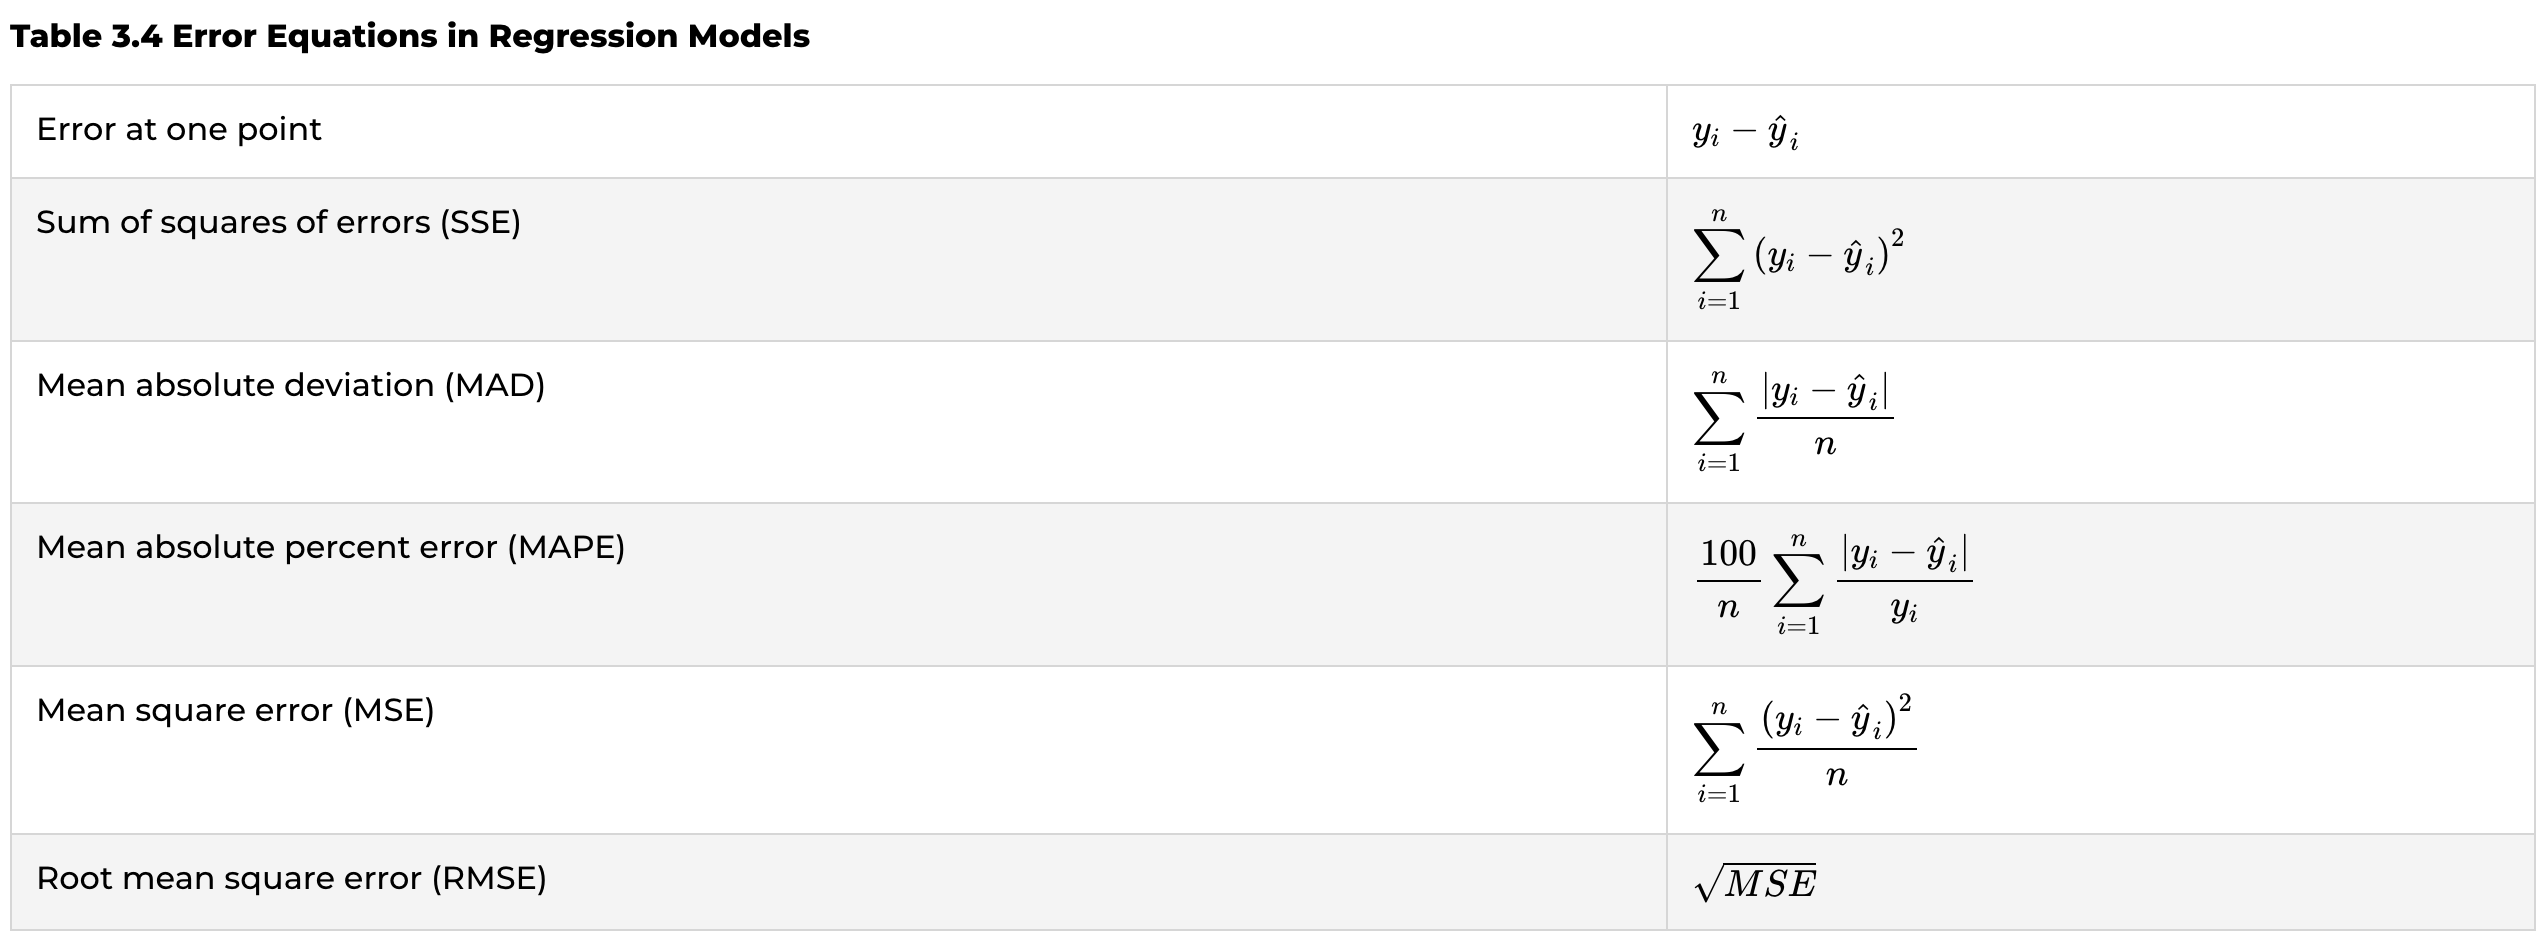

####Variance in the response variable = Variance explained by Regression + Unexplained Variance

$$\sum_{i=1}^n (y_i - \bar y)^2 = \sum_{i=1}^n (\hat y_i - \bar y)^2 + \sum_{i=1}^n (y_i - \hat y_i)^2$$

$$ SST = SSR + SSE $$
$$R^2 = \frac {SSR} {SST} = \frac {Explained\ variance}{Total\  variance}$$



##Next Steps

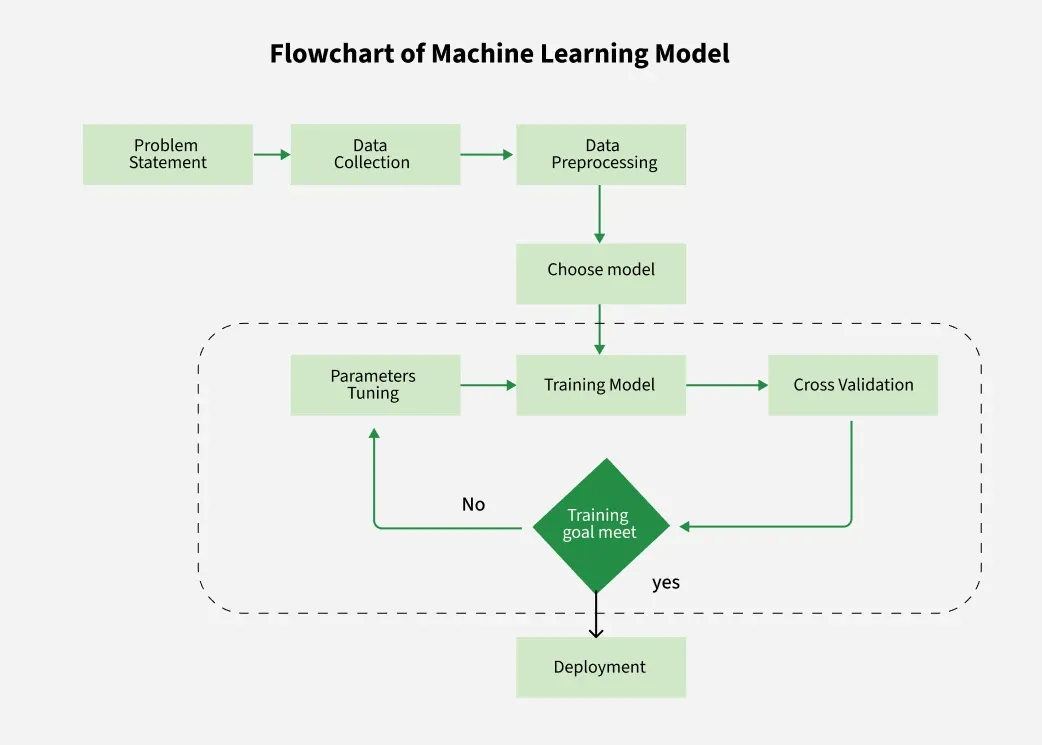

###Key Concepts in Machine Learning
*Correlation:* Measures the strength and direction of a linear relationship between two variables.

*Covariance:* Measures the extent to which two variables change together.

*Linear Regression:* A statistical method used to model the linear relationship between a dependent variable and one or more independent variables.

**Bias-Variance Trade-off:** A fundamental concept in machine learning that describes the trade-off between a model's ability to fit the training data well (low bias) and its ability to generalize to unseen data (low variance).

**Overfitting and Underfitting:**

*Overfitting:* When a model learns the training data too well, including the noise, and performs poorly on unseen data.

*Underfitting:* When a model is too simple to capture the underlying patterns in the data and performs poorly on both training and unseen data.

*Cross-Validation:* A technique used to evaluate the performance of a machine learning model on unseen data by splitting the dataset into multiple folds.

###Applications of Statistics in Machine Learning
Statistics plays a vital role in various aspects of machine learning, including:

**Data Preprocessing:** Handling missing data, outlier detection, feature scaling, etc.

**Feature Selection and Engineering:** Identifying and creating relevant features for model training.

**Model Selection and Evaluation:** Choosing the best model for a given task and assessing its performance using metrics like accuracy, precision, recall, F1-score, RMSE, etc.

**Hyperparameter Tuning:** Optimizing the parameters of a machine learning model.

**Understanding Model Behavior:** Interpreting model results and identifying potential issues.

#Lecture 2

##Review
* Measuring Errors - See Table 3.4 above

* Bias-Variance Trade-off

In machine learning, "bias" refers to the error introduced by approximating a real-world problem, which may be complex, by a simplified model. It's not represented by a single, universal formula like a mathematical equation for a model's parameters.

Instead, bias is understood in the context of the Bias-Variance Trade-off. This trade-off describes how a model's complexity affects its error.

High Bias (Underfitting): A model with high bias is too simple to capture the underlying patterns in the data. It will have large errors on both the training and test datasets. Think of it as the model consistently missing the mark because its assumptions are too rigid.

Low Bias: A model with low bias can capture complex patterns in the data. However, it might be prone to overfitting, especially if the dataset is small or noisy.

The error of a model can be decomposed into three parts:

###Total Error = (Bias)$^2$ + Variance + Irreducible Error

Where:

Bias$^2$: Represents the error from the model's simplifying assumptions;

Variance: Represents the error from the model's sensitivity to small fluctuations in the training data;

Irreducible Error: Represents the noise in the data that cannot be reduced by any model.

So, while there isn't a single formula for "bias" itself, it's a component of the total error and is conceptually related to how well the model's structure aligns with the true underlying relationship in the data.



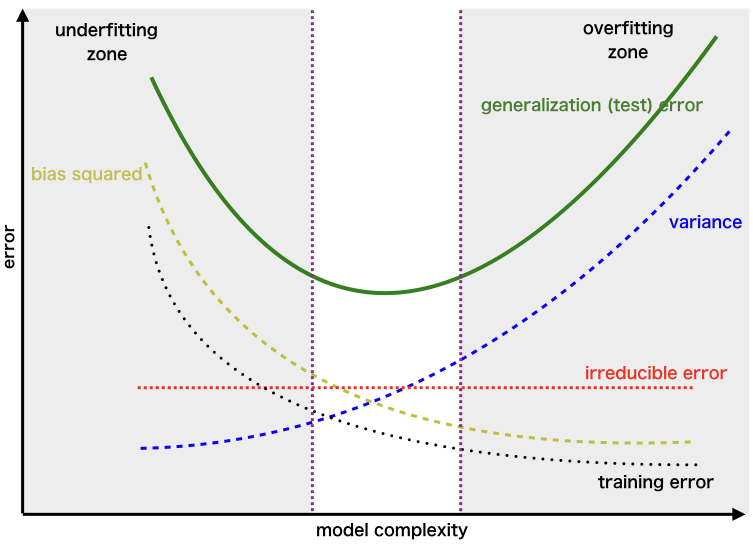

**Covariance:**

The covariance between two variables $X$ and $Y$ is a measure of how much $X$ and $Y$ change together.


For a sample:
$$Cov(X, Y) = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{n-1}$$

Where:
*   $x_i$ and $y_i$ are the individual data points.
*   $\bar{x}$ and $\bar{y}$ are the sample means of $X$ and $Y$.
*   $n$ is the sample size.

**Correlation (Pearson Correlation Coefficient):**

The (Pearson) correlation coefficient, denoted by $r_{X,Y} $ for a  sample, measures the strength and direction of a linear relationship between two variables X and Y. It is the covariance normalized by the product of the standard deviations of the two variables.


For a sample:
$$r_{X,Y} = \frac{Cov(X, Y)}{s_x s_y} = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2}\sqrt{\sum_{i=1}^{n}(y_i - \bar{y})^2}}$$

Where:
*   $Cov(X, Y)$ is the covariance between $X$ and $Y$.
*   $s_x$ and $s_y$ are the sample standard deviations of $X$ and $Y$.

The correlation coefficient ranges from -1 to +1.
*   +1 indicates a perfect positive linear relationship.
*   -1 indicates a perfect negative linear relationship.
*   0 indicates no linear relationship.

##Typical steps for conducting Exploratory Data Analysis (EDA) in machine learning:

1.  **Understand the Data:**
    *   Load the dataset and inspect its structure (e.g., using `.head()`, `.info()`, `.shape`).
    *   Understand the meaning of each column and the data types.
    *   Check for missing values (e.g., using `.isnull().sum()`) and decide how to handle them.
    *   Identify potential data quality issues (e.g., outliers, inconsistent formats).

2.  **Summarize the Data:**
    *   Generate descriptive statistics for numerical columns (e.g., using `.describe()`) to understand central tendency, dispersion, and shape.
    *   Summarize categorical columns (e.g., using `.value_counts()`) to understand the distribution of categories.

3.  **Visualize the Data:**
    *   Use various plots to visualize the distribution of individual variables (e.g., histograms, density plots, box plots).
    *   Visualize relationships between variables (e.g., scatter plots, line plots, pair plots).
    *   Use heatmaps to visualize the correlation matrix between numerical variables.
    *   Create visualizations to understand the distribution of the target variable and its relationship with features.

4.  **Identify Patterns and Relationships:**
    *   Look for trends, patterns, and correlations in the data.
    *   Identify potential relationships between features and the target variable.
    *   Spot outliers and anomalies that may require further investigation.

5.  **Feature Engineering (Optional but often part of EDA):**
    *   Create new features from existing ones that might be more informative for the model.
    *   Transform existing features (e.g., log transformation for skewed data).

6.  **Document Findings:**
    *   Keep track of the insights gained during EDA.
    *   Document any decisions made regarding data cleaning, transformation, or feature engineering.

EDA is an iterative process, and you may go back and forth between these steps as you explore your data. The goal is to gain a deep understanding of the data before building a machine learning model.

# Task
##Perform exploratory data analysis on the air passenger dataset using *seaborn*.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
air_passengers = pd.read_csv('drive/My Drive/Colab Notebooks/Air_Passengers.csv')
air_passengers.head()

,Passengers_count,marketing_cost,percent_delayed_flights,number_of_trips,customer_ratings,poor_weather_index,percent_male_customers,Holiday_week,percent_female_customers
0,23291,3588.1,0.21,1503,5,0.19,38,0,61.2
1,25523,3186.3,0.20,1881,6,0.22,35,0,64.4
2,25620,3342.0,0.27,1850,7,0.27,51,0,48.0
3,19625,2512.5,0.18,1295,8,0.19,37,0,62.6
4,27231,3012.1,0.23,1100,9,0.24,38,0,61.2


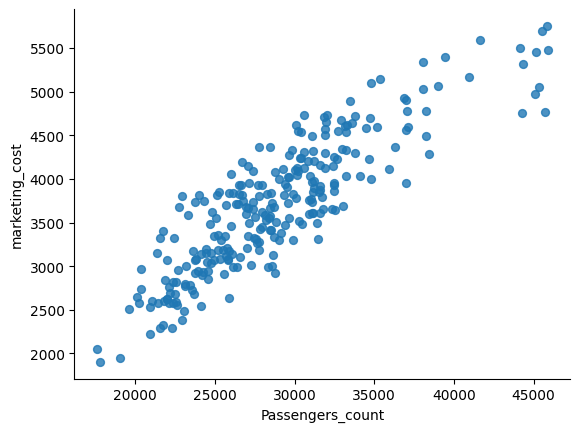

In [ ]:
# @title Passengers_count vs marketing_cost

from matplotlib import pyplot as plt
air_passengers.plot(kind='scatter', x='Passengers_count', y='marketing_cost', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

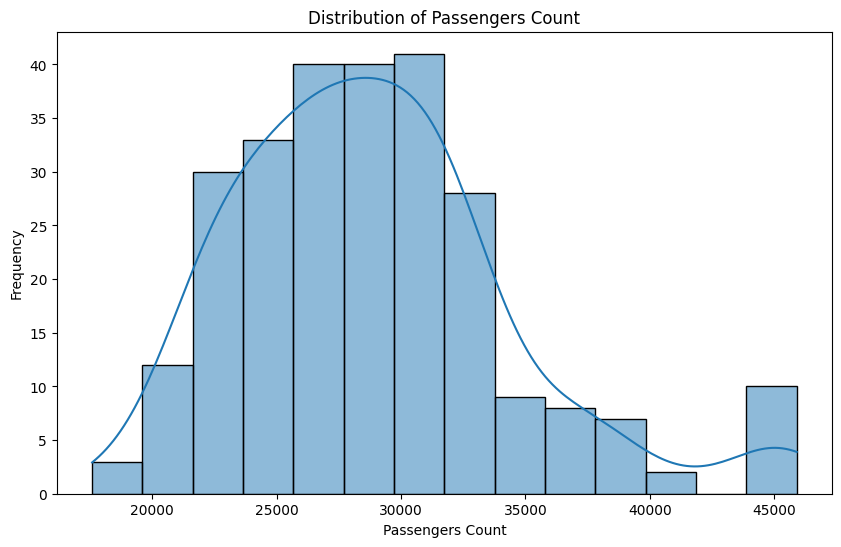

In [ ]:
# Distribution of 'Passengers_count' from the air_passengers dataframe

plt.figure(figsize=(10, 6))
sns.histplot(air_passengers['Passengers_count'], kde=True)
plt.title('Distribution of Passengers Count')
plt.xlabel('Passengers Count')
plt.ylabel('Frequency')
plt.show()

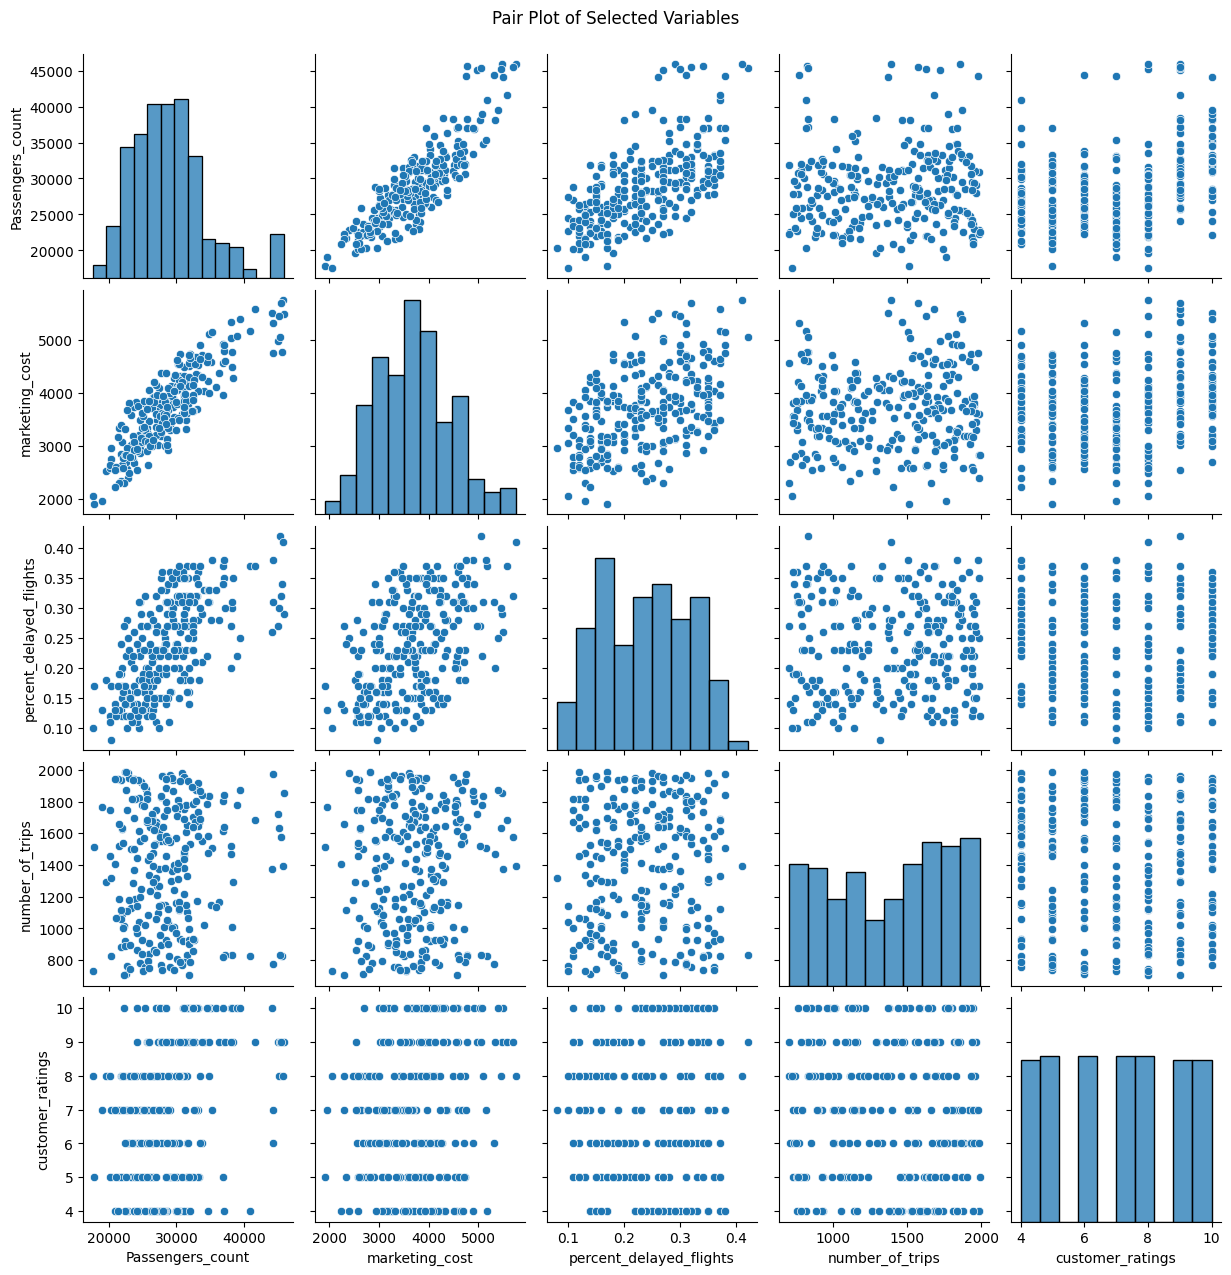

In [ ]:
# Visualizing relationships - Pairwise
# Example with a subset of columns

subset_cols = ['Passengers_count', 'marketing_cost', 'percent_delayed_flights','number_of_trips', 'customer_ratings']
sns.pairplot(air_passengers[subset_cols])
plt.suptitle('Pair Plot of Selected Variables', y=1.02)
plt.show()

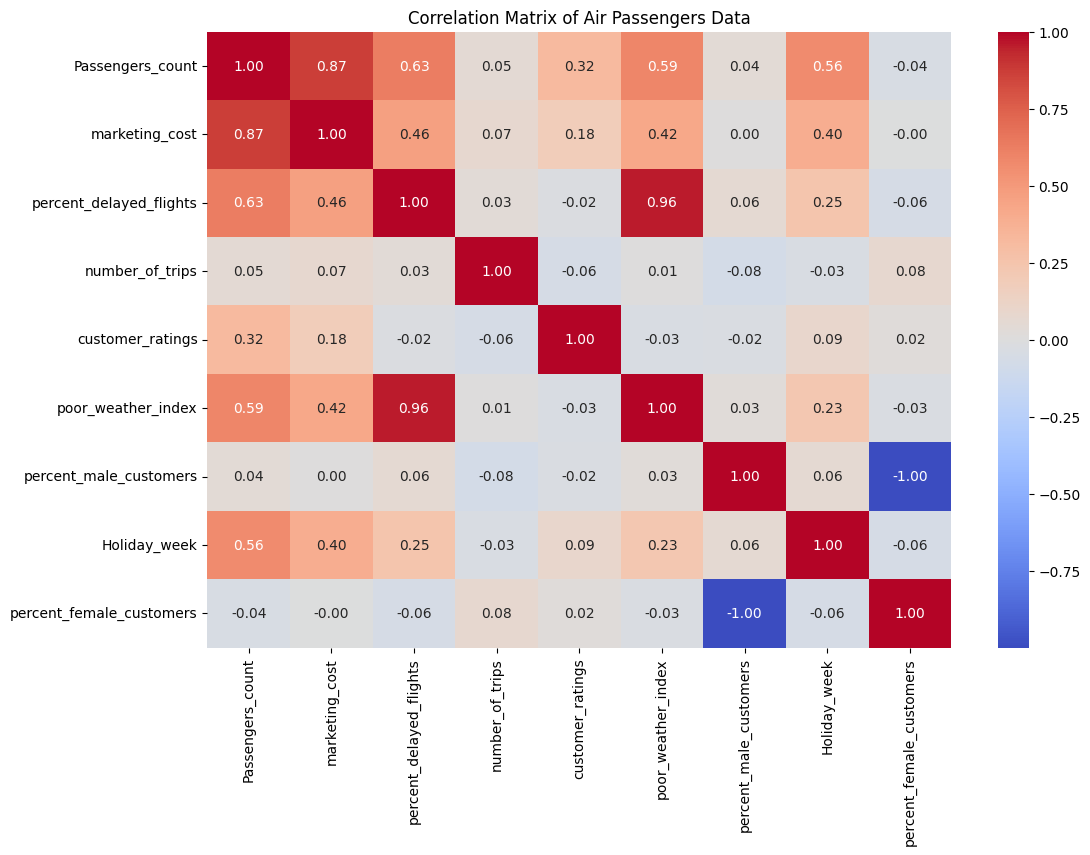

In [ ]:
# Correlation among the target and features

plt.figure(figsize=(12, 8))
sns.heatmap(air_passengers.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Air Passengers Data')
plt.show()

In [ ]:
# Another Simple Linear Regression Model

import statsmodels.formula.api as sm
model2 = sm.ols(formula='Passengers_count ~ customer_ratings', data=air_passengers)
fitted2 = model2.fit()
fitted2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Passengers_count   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     29.72
Date:                Fri, 05 Sep 2025   Prob (F-statistic):           1.16e-07
Time:                        00:52:48   Log-Likelihood:                -2627.4
No. Observations:                 263   AIC:                             5259.
Df Residuals:                     261   BIC:                             5266.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.261e+04   1192.915     18.955      0.000    2.03e+04     2.5e+04
customer_ratings   894.4643    164.083      5.451      0.000     571.369    1217.560
==============================================================================
Omnibus:                       28.234   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.541
Skew:                           0.767   Prob(JB):                     1.92e-08
Kurtosis:                       3.944   Cond. No.                         27.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###Plotting Residuals

In [ ]:
model1 = sm.ols(formula='Passengers_count ~ marketing_cost', data=air_passengers)
fitted1 = model1.fit()
fitted1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Passengers_count   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     830.0
Date:                Fri, 05 Sep 2025   Prob (F-statistic):           4.87e-83
Time:                        00:52:55   Log-Likelihood:                -2453.4
No. Observations:                 263   AIC:                             4911.
Df Residuals:                     261   BIC:                             4918.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5186.6868    839.019      6.182      0.000    3534.579    6838.795
marketing_cost     6.3901      0.222     28.810      0.000       5.953       6.827
==============================================================================
Omnibus:                        8.874   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                9.679
Skew:                           0.342   Prob(JB):                      0.00791
Kurtosis:                       3.644   Cond. No.                     1.88e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

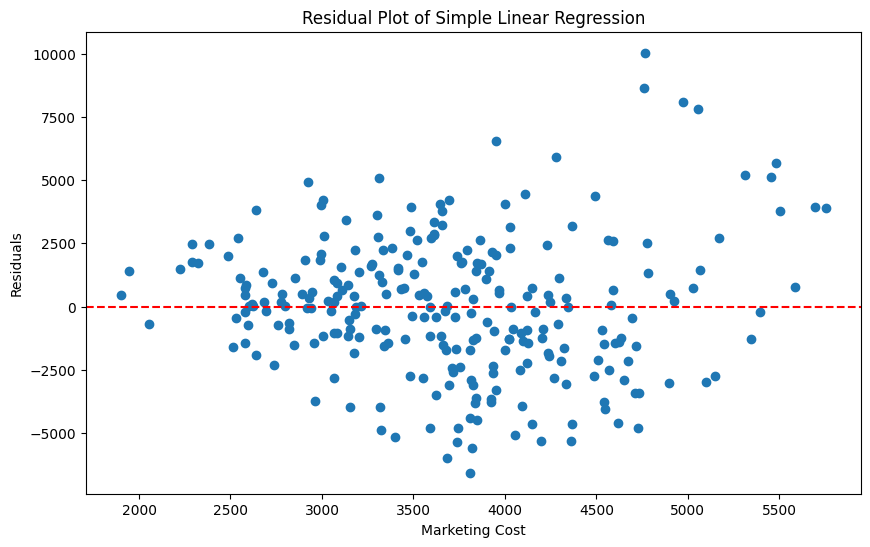

In [ ]:
# Calculate the residuals from Model 1
residuals = fitted1.resid

# Plot the residuals against the independent variable (marketing_cost)
plt.figure(figsize=(10, 6))
plt.scatter(air_passengers['marketing_cost'], residuals)
plt.axhline(y=0, color='r', linestyle='--') # Add a horizontal line at y=0
plt.title('Residual Plot of Simple Linear Regression')
plt.xlabel('Marketing Cost')
plt.ylabel('Residuals')
plt.show()

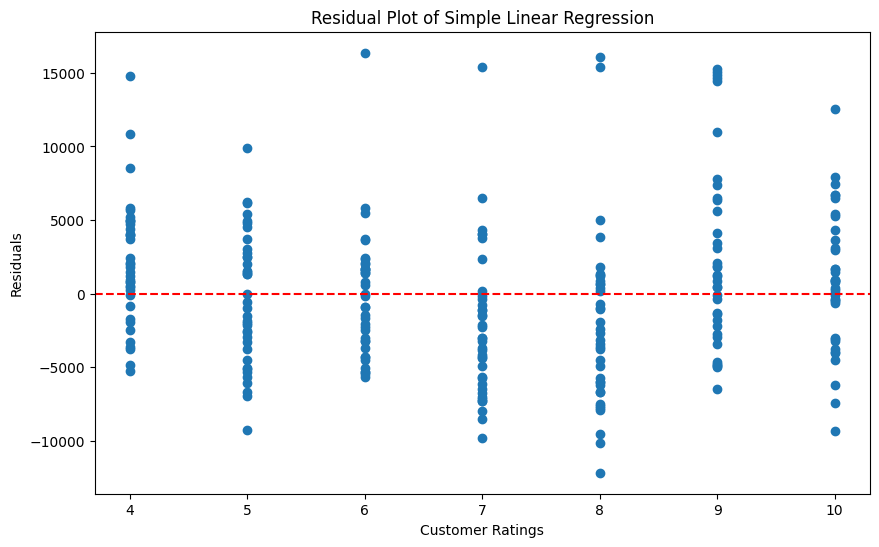

In [ ]:
# Calculate the residuals from Model 2
residuals2 = fitted2.resid

# Plot the residuals against the independent variable (customer_ratings)
plt.figure(figsize=(10, 6))
plt.scatter(air_passengers['customer_ratings'], residuals2)
plt.axhline(y=0, color='r', linestyle='--') # Add a horizontal line at y=0
plt.title('Residual Plot of Simple Linear Regression')
plt.xlabel('Customer Ratings')
plt.ylabel('Residuals')
plt.show()

#Multiple Linear Regression Models

In practice, we usually have more than one feature. In this case the model becomes
$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... \beta_p X_p + \epsilon$$
where
    
$$\epsilon \sim N(0, \sigma)$$

And again, we find the best-fit $\beta$
$$
\hat Y = \hat \beta_0 + \hat \beta_1 X_1 + \hat \beta_2 X_2 + ... \hat \beta_p X_p
= X^T \beta$$





##Multiple Regression Model Example

###Let us try the *full* model for the Airline Passengers data.

In [ ]:
##Multiple Regression Model

model3 = sm.ols(formula=('Passengers_count ~ marketing_cost + percent_delayed_flights +'
                        'number_of_trips + customer_ratings + poor_weather_index +'
                        'percent_female_customers + Holiday_week + percent_male_customers'),
               data=air_passengers)
fitted3 = model3.fit()
fitted3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Passengers_count   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     325.3
Date:                Fri, 05 Sep 2025   Prob (F-statistic):          8.93e-129
Time:                        01:16:35   Log-Likelihood:                -2323.3
No. Observations:                 263   AIC:                             4665.
Df Residuals:                     254   BIC:                             4697.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 4173.3041   3.71e+04      0.113      0.910   -6.88e+04    7.71e+04
marketing_cost               4.4279      0.168     26.287      0.000       4.096       4.760
percent_delayed_flights   2.187e+04   4827.398      4.530      0.000    1.24e+04    3.14e+04
number_of_trips              0.3004      0.270      1.114      0.266      -0.231       0.831
customer_ratings           546.3104     53.897     10.136      0.000     440.168     652.453
poor_weather_index        -919.5035   4520.130     -0.203      0.839   -9821.210    7982.203
percent_female_customers   -15.7188    371.808     -0.042      0.966    -747.937     716.499
Holiday_week              6804.5389    598.471     11.370      0.000    5625.942    7983.136
percent_male_customers      -7.3113    372.653     -0.020      0.984    -741.195     726.572
==============================================================================
Omnibus:                        0.087   Durbin-Watson:                   1.778
Prob(Omnibus):                  0.957   Jarque-Bera (JB):                0.082
Skew:                           0.041   Prob(JB):                        0.960
Kurtosis:                       2.969   Cond. No.                     1.43e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###The reduced model

####To get a better model:
* Remove features that are not significant
* Check for multicollinearity

In [ ]:
## Try this on your own - remove features that are not significant

##model4 = sm.ols(formula=('Passengers_count ~ marketing_cost + percent_delayed_flights +'
##                        'number_of_trips + customer_ratings + poor_weather_index +'
##                        'percent_female_customers + Holiday_week + percent_male_customers'),
##              data=air_passengers)
##fitted4 = model4.fit()
##fitted4.summary()

##Multicollinearity

Multicollinearity occurs when independent variables in a regression model are *not* independent of each other. This can cause problems because it makes it difficult for the model to determine the individual effect of each correlated variable on the response variable.

In multiple linear regression, one way to measure multicollinearity is to use VIF, which stands for **Variance Inflation Factor**.

It's a measure used to detect multicollinearity, which is a phenomenon where two or more predictor variables in a multiple regression model are highly correlated.

How VIF Works:

VIF quantifies how much the variance of the estimated regression coefficient is increased due to multicollinearity. For each predictor variable, the VIF is calculated by performing a linear regression of that predictor against all other predictor variables in the model.

The formula for VIF for a predictor $X_j$ is:

$$VIF_j = \frac{1}{1 - R_j^2}$$

where $R_j^2$ is the coefficient of determination (R-squared) from the regression of $X_j$ on all other predictor variables.



Interpreting VIF Values:

VIF = 1: No multicollinearity. The predictor variable is not correlated with any of the other predictor variables.

1 < VIF < 5: Moderate multicollinearity. This level is generally considered acceptable, but it's worth keeping track of it.

VIF >= 5 or 10 (threshold varies): High multicollinearity. This indicates that the predictor variable is highly correlated with other predictors and can cause issues in the regression analysis.
Why is High VIF a Problem?

High VIF values can lead to:

Unstable Coefficient Estimates: The estimated regression coefficients can change dramatically with small changes in the data.
Difficulty Interpreting Coefficients: It becomes hard to understand the individual impact of a predictor variable on the dependent variable.
Reduced Statistical Power: It may be difficult to find statistically significant relationships even if they exist.
How to Address High VIF:

If you find high VIF values, some common approaches to address multicollinearity include:

Removing one of the correlated variables: If two variables are highly correlated, you might choose to remove one of them from the model.

Combining correlated variables: You can create a new variable that is a combination (e.g., sum or average) of the correlated variables.

Using dimensionality reduction techniques: Methods like Principal Component Analysis (PCA) can create new, uncorrelated variables.

Collecting more data: Sometimes, with a larger dataset, the multicollinearity issues may be less severe.

In summary, VIF is a valuable tool in multiple regression to diagnose and understand the extent of multicollinearity among your predictor variables.

###Calculating VIF

In [ ]:
##VIF

def vif_calc(x_vars):
  xvar_names=x_vars.columns
  for i in range(0,xvar_names.shape[0]):
    y=x_vars[xvar_names[i]]
    x=x_vars[xvar_names.drop(xvar_names[i])]
    rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared
    vif=round(1/(1-rsq),2)
    print(xvar_names[i],"VIF = ", vif)

In [ ]:
vif_calc(x_vars=air_passengers.drop(["Passengers_count"],axis=1))

marketing_cost VIF =  1.51
percent_delayed_flights VIF =  13.4
number_of_trips VIF =  1.03
customer_ratings VIF =  1.06
poor_weather_index VIF =  12.81
percent_male_customers VIF =  990.52
Holiday_week VIF =  1.21
percent_female_customers VIF =  989.91


###Removing Multicollinearity

We cannot remove multicollineariy by dropping all correlated features in one step - need to drop features sequentially.

In [ ]:
vif_calc(x_vars=air_passengers.drop(["Passengers_count", "percent_male_customers"],axis=1))

marketing_cost VIF =  1.51
percent_delayed_flights VIF =  13.34
number_of_trips VIF =  1.03
customer_ratings VIF =  1.06
poor_weather_index VIF =  12.78
Holiday_week VIF =  1.2
percent_female_customers VIF =  1.03


###Refit model

In [ ]:
## Make changes in the formula

## Keep the final set of features
"""
model5 = sm.ols(formula=('Passengers_count ~ marketing_cost + percent_delayed_flights +'
                        'number_of_trips + customer_ratings + poor_weather_index +'
                        'percent_female_customers + Holiday_week + percent_male_customers'),
               data=air_passengers)
fitted5 = model5.fit()
fitted5.summary()

"""

## The assumptions of linear regression

The **Gauss–Markov theorem** states that, if certain assumptions are true, then the best linear unbiased estimator (BLUE) is given by ordinary least squares.
 * Linearity
 * Full rank
 * Exogeneity of regressors
 * Spherical errors
     * Homoscedastic
     * No autocorrelation
     
### Linearity

The main assumption of linear regression. What's an example of a non-linear relationship?

### Full rank

The various features that make up $X$ must be lineararly independent. If not, we need to drop one or more of them.

In practice, that's generally true, but partial multicollinearity has a cost.

The variable inflation factor is measure of how the variance of parameter estimates are affected by additional variables.

### Exogeneity

Exogeneity assumes that the features are uncorrelated with the errors, i.e., $\mathbb E[x_i \epsilon_i] = 0$

Endogeneity could arise because:
 * measurement error correlates with the features (e.g., if one class of people  underreports their income)
 * an unobserved variable correlates with the features, e.g.

$$income_i = \beta_0 + \beta_{educ} educ_i + \epsilon_i$$


### Spherical errors

That is, the variance of the errors in sample space is spherically symmetric.

This is usually seen as having two parts. First, that there is no autocorrelation: the errors at one point are uncorrelated with those at another. We'll revisit this when we talk about time series.

Second, the errors are homoscedastic, i.e., that the variance is uncorrelated with the features. Often heteroscedasticity can be fixed by transforming the data. The Goldfeld-Quandt test evaluates this.


### Normal distribution of residuals

#### Q-Q plots

Quantile-quantile plots are used to compare two distributions to determine if points at the same quantiles fall the same relative distance from the mean. Plotting against a normal distribution is a good way to test for normality.

In [ ]:
##Q-Q plots
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Calculate the residuals from the multiple regression model (model3)
residuals_multiple = fitted5.resid

# Create the Q-Q plot
fig = sm.qqplot(residuals_multiple, line='s') # line='s' plots a line connecting the first and third quartiles
plt.title('Q-Q Plot of Residuals for Multiple Linear Regression')
plt.show()


#Lecture 3

* ## 'Final' model for airline passengers data
* ## Checking Regression assumptions -
  * ## Residual plot
  * ## Normality: Q-Q plot
* ## Steps to build a multiple regression model
  * ## Handling Categorical features
* ## Derivation of Least Squares Estimates
  * ### Geometric Interpretation

In [ ]:
## Make changes in the formula

## Keep the final set of features

import statsmodels.api as sm
"""
model5 = sm.ols(formula=('Passengers_count ~ marketing_cost + percent_delayed_flights +'
                        'number_of_trips + customer_ratings + poor_weather_index +'
                        'percent_female_customers + Holiday_week + percent_male_customers'),
               data=air_passengers)
fitted5 = model5.fit()
fitted5.summary()

"""

In [ ]:
import matplotlib.pyplot as plt

# Calculate the residuals from the multiple regression model (model5)
residuals_multiple = fitted5.resid

# Get the fitted values (predicted values) from the model
fitted_values = fitted5.predict(air_passengers)

# Plot the residuals against the fitted values
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, residuals_multiple)
plt.axhline(y=0, color='r', linestyle='--') # Add a horizontal line at y=0
plt.title('Residual Plot for Multiple Linear Regression')
plt.xlabel('Fitted Values (Predicted Passengers Count)')
plt.ylabel('Residuals')
plt.show()

In [ ]:
# Calculate the residuals from the multiple regression model (model3)
residuals_multiple = fitted5.resid

# Create the Q-Q plot
fig = sm.qqplot(residuals_multiple, line='s') # line='s' plots a line connecting the first and third quartiles
plt.title('Q-Q Plot of Residuals for Multiple Linear Regression')
plt.show()

##Steps to build a multiple regression model

###Chpter 3 Regression and Logistic Regression
####Source: Machine Learning and Deep learning ...
####Authors: Konasani and Kadre
###Section 3.7

###Handling Categorical Features
* #### Dummy variables
* #### One-hot encoding


In [ ]:
import pandas as pd

# Sample data
data = {'Color': ['Red', 'Green', 'Blue', 'Red']}
df = pd.DataFrame(data)

# Applying one-hot encoding
df_encoded = pd.get_dummies(df, dtype=int)

# Displaying the encoded DataFrame
print(df_encoded)

###Derivation of Least Sqares Estimates

## Proof for Least Squares Estimates in Simple Linear Regression

The simple linear regression model is given by:
$$y_i = \beta_0 + \beta_1 x_i + \epsilon_i$$
where $y_i$ is the dependent variable, $x_i$ is the independent variable, $\beta_0$ is the intercept, $\beta_1$ is the slope, and $\epsilon_i$ is the error term.

The estimated linear regression model is:
$$\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i$$
where $\hat{y}_i$ are the predicted values, and $\hat{\beta}_0$ and $\hat{\beta}_1$ are the estimated coefficients.

The residual for each data point is:
$$\epsilon_i = y_i - \hat{y}_i = y_i - (\hat{\beta}_0 + \hat{\beta}_1 x_i)$$

The **Residual Sum of Squares (RSS)** is the sum of the squared residuals:
$$RSS = \sum_{i=1}^n \epsilon_i^2 = \sum_{i=1}^n (y_i - (\hat{\beta}_0 + \hat{\beta}_1 x_i))^2$$

To find the values of $\hat{\beta}_0$ and $\hat{\beta}_1$ that minimize the RSS, we take the partial derivatives of the RSS with respect to $\hat{\beta}_0$ and $\hat{\beta}_1$ and set them to zero.

**Partial Derivative with respect to $\hat{\beta}_0$:**

$$\frac{\partial RSS}{\partial \hat{\beta}_0} = \frac{\partial}{\partial \hat{\beta}_0} \sum_{i=1}^n (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i)^2$$

Using the chain rule, this becomes:
$$\sum_{i=1}^n 2 (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) (-1) = -2 \sum_{i=1}^n (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i)$$

Setting the partial derivative to zero:
$$-2 \sum_{i=1}^n (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) = 0$$
$$\sum_{i=1}^n (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) = 0$$
$$\sum_{i=1}^n y_i - \sum_{i=1}^n \hat{\beta}_0 - \sum_{i=1}^n \hat{\beta}_1 x_i = 0$$
$$\sum_{i=1}^n y_i - n \hat{\beta}_0 - \hat{\beta}_1 \sum_{i=1}^n x_i = 0$$

Dividing by $n$:
$$\frac{\sum_{i=1}^n y_i}{n} - \hat{\beta}_0 - \hat{\beta}_1 \frac{\sum_{i=1}^n x_i}{n} = 0$$
$$\bar{y} - \hat{\beta}_0 - \hat{\beta}_1 \bar{x} = 0$$

Solving for $\hat{\beta}_0$:
$$\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}$$
This is the first normal equation.

**Partial Derivative with respect to $\hat{\beta}_1$:**

$$\frac{\partial RSS}{\partial \hat{\beta}_1} = \frac{\partial}{\partial \hat{\beta}_1} \sum_{i=1}^n (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i)^2$$

Using the chain rule, this becomes:
$$\sum_{i=1}^n 2 (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) (-x_i) = -2 \sum_{i=1}^n x_i (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i)$$

Setting the partial derivative to zero:
$$-2 \sum_{i=1}^n x_i (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) = 0$$
$$\sum_{i=1}^n x_i (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) = 0$$
$$\sum_{i=1}^n (x_i y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) = 0$$
$$\sum_{i=1}^n x_i y_i - \hat{\beta}_0 \sum_{i=1}^n x_i - \hat{\beta}_1 \sum_{i=1}^n x_i^2 = 0$$

Now, substitute the expression for $\hat{\beta}_0$ from the first normal equation ($\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}$):
$$\sum_{i=1}^n x_i y_i - (\bar{y} - \hat{\beta}_1 \bar{x}) \sum_{i=1}^n x_i - \hat{\beta}_1 \sum_{i=1}^n x_i^2 = 0$$
$$\sum_{i=1}^n x_i y_i - \bar{y} \sum_{i=1}^n x_i + \hat{\beta}_1 \bar{x} \sum_{i=1}^n x_i - \hat{\beta}_1 \sum_{i=1}^n x_i^2 = 0$$
$$\sum_{i=1}^n x_i y_i - n \bar{y} \bar{x} + \hat{\beta}_1 n \bar{x}^2 - \hat{\beta}_1 \sum_{i=1}^n x_i^2 = 0$$
$$\sum_{i=1}^n x_i y_i - n \bar{x} \bar{y} = \hat{\beta}_1 \left( \sum_{i=1}^n x_i^2 - n \bar{x}^2 \right)$$

We have:
$$\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}) = \hat{\beta}_1 \sum_{i=1}^n (x_i - \bar{x})^2$$

Solving for $\hat{\beta}_1$:
$$\hat{\beta}_1 = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2}$$
So, $\hat{\beta}_1$ can also be written as:
$$\hat{\beta}_1 = \frac{\sum_{i=1}^n (x_i - \bar{x})y_i}{\sum_{i=1}^n (x_i - \bar{x})^2}$$

These are the formulas for the least squares estimates of the intercept and slope in a simple linear regression model.

## Proof for Regression Coefficients in Multiple Linear Regression (Matrix Form)

The multiple linear regression model in matrix form is:
$$\mathbf{y} = \mathbf{X} \boldsymbol{\beta} + \boldsymbol{\epsilon}$$
where:
* $\mathbf{y}$ is the vector of dependent variable observations ($n \times 1$).
* $\mathbf{X}$ is the design matrix of independent variables, including a column of ones for the intercept ($n \times (p+1)$).
* $\boldsymbol{\beta}$ is the vector of regression coefficients, including the intercept ($\mathbf{p+1} \times 1$).
* $\boldsymbol{\epsilon}$ is the vector of error terms ($n \times 1$).

The estimated model is:
$$\hat{\mathbf{y}} = \mathbf{X} \hat{\boldsymbol{\beta}}$$
where $\hat{\mathbf{y}}$ is the vector of predicted values and $\hat{\boldsymbol{\beta}}$ is the vector of estimated coefficients.

The vector of residuals is:
$$\mathbf{e} = \mathbf{y} - \hat{\mathbf{y}} = \mathbf{y} - \mathbf{X} \hat{\boldsymbol{\beta}}$$

The **Residual Sum of Squares (RSS)** in matrix form is the sum of the squared residuals, which can be written as the dot product of the residual vector with itself:
$$RSS = \mathbf{e}^T \mathbf{e} = (\mathbf{y} - \mathbf{X} \hat{\boldsymbol{\beta}})^T (\mathbf{y} - \mathbf{X} \hat{\boldsymbol{\beta}})$$

Expanding the expression:
$$RSS = (\mathbf{y}^T - (\mathbf{X} \hat{\boldsymbol{\beta}})^T) (\mathbf{y} - \mathbf{X} \hat{\boldsymbol{\beta}})$$
$$RSS = (\mathbf{y}^T - \hat{\boldsymbol{\beta}}^T \mathbf{X}^T) (\mathbf{y} - \mathbf{X} \hat{\boldsymbol{\beta}})$$
$$RSS = \mathbf{y}^T \mathbf{y} - \mathbf{y}^T \mathbf{X} \hat{\boldsymbol{\beta}} - \hat{\boldsymbol{\beta}}^T \mathbf{X}^T \mathbf{y} + \hat{\boldsymbol{\beta}}^T \mathbf{X}^T \mathbf{X} \hat{\boldsymbol{\beta}}$$

Since $\mathbf{y}^T \mathbf{X} \hat{\boldsymbol{\beta}}$ is a scalar (a $1 \times 1$ matrix), its transpose is equal to itself: $(\mathbf{y}^T \mathbf{X} \hat{\boldsymbol{\beta}})^T = \hat{\boldsymbol{\beta}}^T \mathbf{X}^T \mathbf{y}$.
So, we can simplify the RSS expression:
$$RSS = \mathbf{y}^T \mathbf{y} - 2 \hat{\boldsymbol{\beta}}^T \mathbf{X}^T \mathbf{y} + \hat{\boldsymbol{\beta}}^T \mathbf{X}^T \mathbf{X} \hat{\boldsymbol{\beta}}$$

To minimize the RSS with respect to $\hat{\boldsymbol{\beta}}$, we take the derivative of the RSS with respect to the vector $\hat{\boldsymbol{\beta}}$ and set it to the zero vector. We use the following matrix calculus rules:
* $\frac{\partial}{\partial \mathbf{v}} (\mathbf{a}^T \mathbf{v}) = \mathbf{a}$
* $\frac{\partial}{\partial \mathbf{v}} (\mathbf{v}^T \mathbf{A} \mathbf{v}) = 2 \mathbf{A} \mathbf{v}$ (if $\mathbf{A}$ is symmetric)

In our RSS expression, $\mathbf{y}^T \mathbf{y}$ does not depend on $\hat{\boldsymbol{\beta}}$, so its derivative is zero.
For the second term, $-2 \hat{\boldsymbol{\beta}}^T \mathbf{X}^T \mathbf{y}$, let $\mathbf{v} = \hat{\boldsymbol{\beta}}$ and $\mathbf{a} = -2 \mathbf{X}^T \mathbf{y}$. The derivative is $-2 \mathbf{X}^T \mathbf{y}$.
For the third term, $\hat{\boldsymbol{\beta}}^T \mathbf{X}^T \mathbf{X} \hat{\boldsymbol{\beta}}$, let $\mathbf{v} = \hat{\boldsymbol{\beta}}$ and $\mathbf{A} = \mathbf{X}^T \mathbf{X}$. The matrix $\mathbf{X}^T \mathbf{X}$ is always symmetric. The derivative is $2 \mathbf{X}^T \mathbf{X} \hat{\boldsymbol{\beta}}$.

Setting the derivative of RSS with respect to $\hat{\boldsymbol{\beta}}$ to the zero vector:
$$\frac{\partial RSS}{\partial \hat{\boldsymbol{\beta}}} = \mathbf{0}$$
$$-2 \mathbf{X}^T \mathbf{y} + 2 \mathbf{X}^T \mathbf{X} \hat{\boldsymbol{\beta}} = \mathbf{0}$$

Rearranging the terms:
$$2 \mathbf{X}^T \mathbf{X} \hat{\boldsymbol{\beta}} = 2 \mathbf{X}^T \mathbf{y}$$
$$\mathbf{X}^T \mathbf{X} \hat{\boldsymbol{\beta}} = \mathbf{X}^T \mathbf{y}$$

This is the system of linear equations known as the **normal equations**. To solve for $\hat{\boldsymbol{\beta}}$, we multiply both sides by the inverse of $\mathbf{X}^T \mathbf{X}$, assuming that $\mathbf{X}^T \mathbf{X}$ is invertible:
$$(\mathbf{X}^T \mathbf{X})^{-1} (\mathbf{X}^T \mathbf{X}) \hat{\boldsymbol{\beta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$$
$$\mathbf{I} \hat{\boldsymbol{\beta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$$
$$\hat{\boldsymbol{\beta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$$

This formula gives the least squares estimates for the regression coefficients in multiple linear regression. The invertibility of $\mathbf{X}^T \mathbf{X}$ is guaranteed if the columns of $\mathbf{X}$ are linearly independent, which means there is no perfect multicollinearity among the independent variables.